In [50]:
# import de deep learning

# manejo bbdd
import pandas as pd
import numpy as np
import datetime

#gráficas
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#estadística
import math
from scipy.stats import norm
from scipy import stats #para box-cox entre otros
from scipy.stats import skew

#preprocesamiento
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#modelos y evaluación
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.metrics import mean_squared_error,r2_score

In [51]:
data = pd.read_csv('Data/marketing_customer_analysis.csv') 
data

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     10910 non-null  int64  
 1   Customer                       10910 non-null  object 
 2   State                          10279 non-null  object 
 3   Customer Lifetime Value        10910 non-null  float64
 4   Response                       10279 non-null  object 
 5   Coverage                       10910 non-null  object 
 6   Education                      10910 non-null  object 
 7   Effective To Date              10910 non-null  object 
 8   EmploymentStatus               10910 non-null  object 
 9   Gender                         10910 non-null  object 
 10  Income                         10910 non-null  int64  
 11  Location Code                  10910 non-null  object 
 12  Marital Status                 10910 non-null 

In [53]:
numerical = data.select_dtypes("number")
numerical

,Unnamed: 0,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,0,4809.216960,48029,61,7.0,52,0.0,9,292.800000
1,1,2228.525238,0,64,3.0,26,0.0,1,744.924331
2,2,14947.917300,22139,100,34.0,31,0.0,2,480.000000
3,3,22332.439460,49078,97,10.0,3,0.0,2,484.013411
4,4,9025.067525,23675,117,NaN,31,NaN,7,707.925645
...,...,...,...,...,...,...,...,...,...
10905,10905,15563.369440,0,253,NaN,40,NaN,7,1214.400000
10906,10906,5259.444853,61146,65,7.0,68,0.0,6,273.018929
10907,10907,23893.304100,39837,201,11.0,63,0.0,2,381.306996
10908,10908,11971.977650,64195,158,0.0,27,4.0,6,618.288849


In [54]:
categorical = data.select_dtypes("object")
categorical

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Vehicle Type
0,DK49336,Arizona,No,Basic,College,2/18/11,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,NaN
1,KX64629,California,No,Basic,College,1/18/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,No,Basic,Bachelor,2/10/11,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,XL78013,Oregon,Yes,Extended,College,1/11/11,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,QA50777,Oregon,No,Premium,Bachelor,1/17/11,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,No,Premium,Bachelor,1/19/11,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize,A
10906,KX53892,Oregon,No,Basic,College,1/6/11,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A
10907,TL39050,Arizona,No,Extended,Bachelor,2/6/11,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize,NaN
10908,WA60547,California,No,Premium,College,2/13/11,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize,A


In [55]:
numerical.drop(columns="Unnamed: 0", inplace=True)

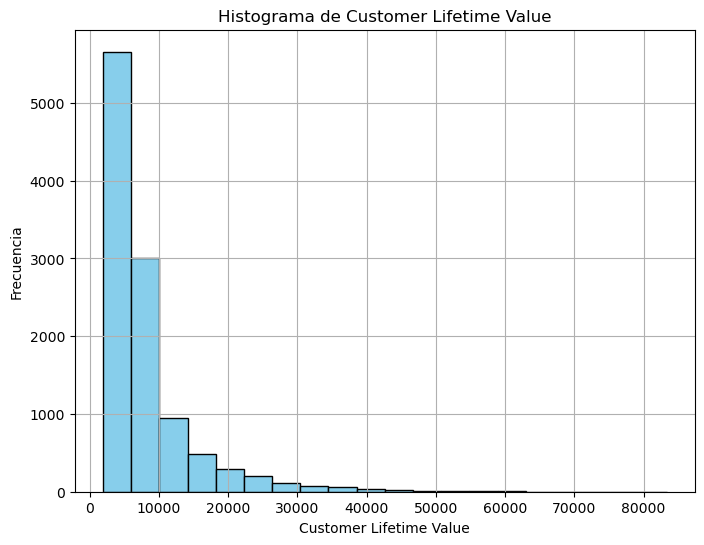

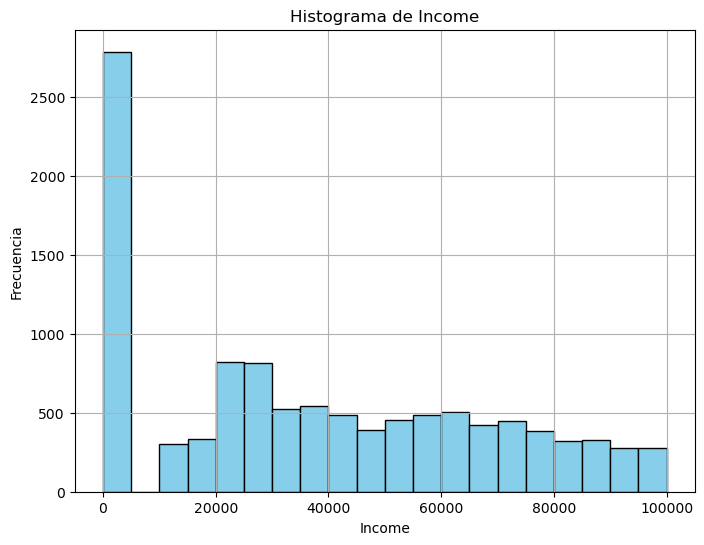

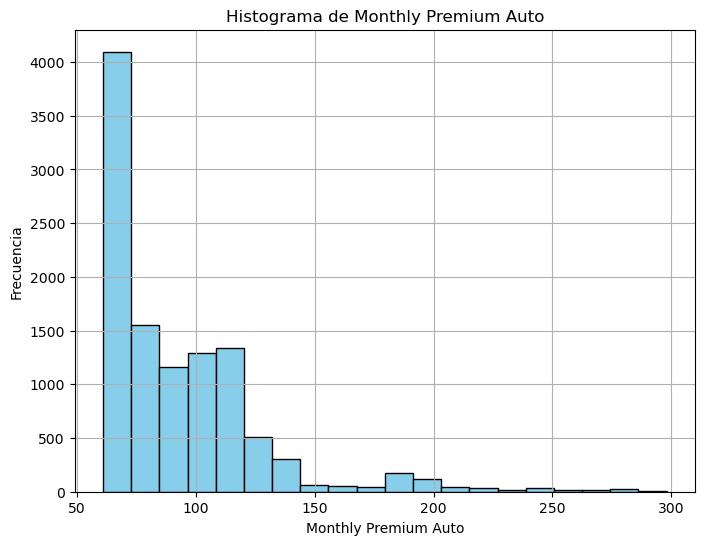

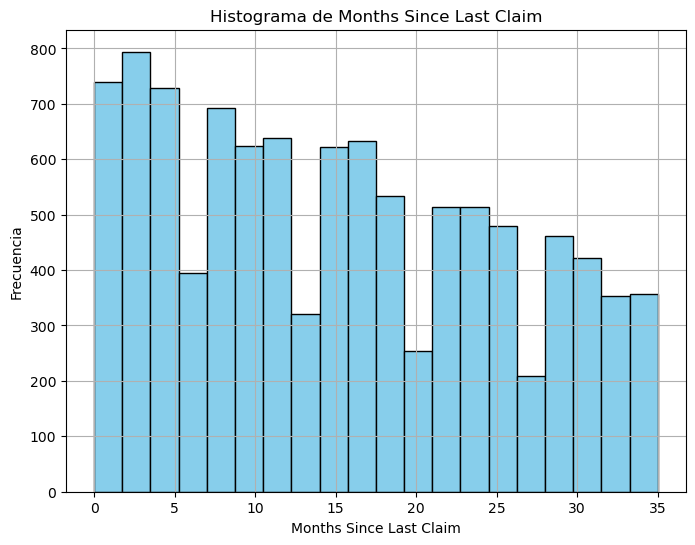

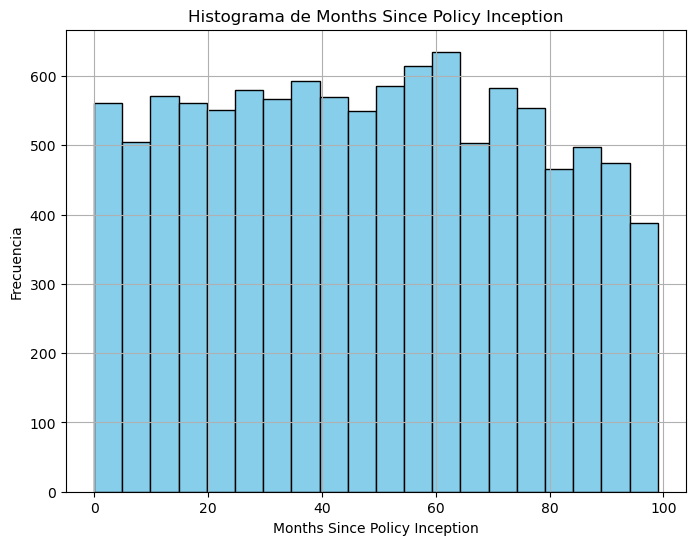

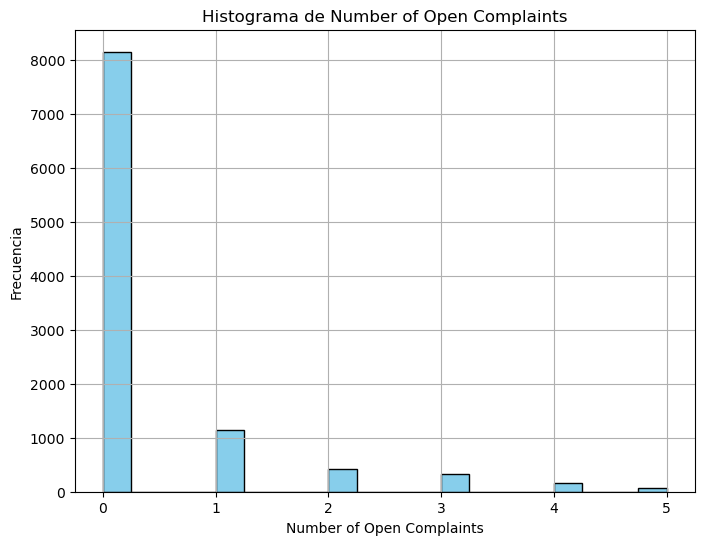

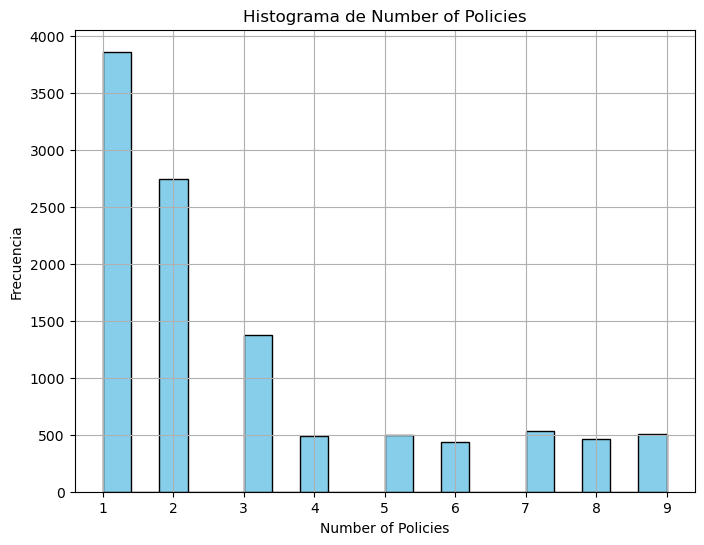

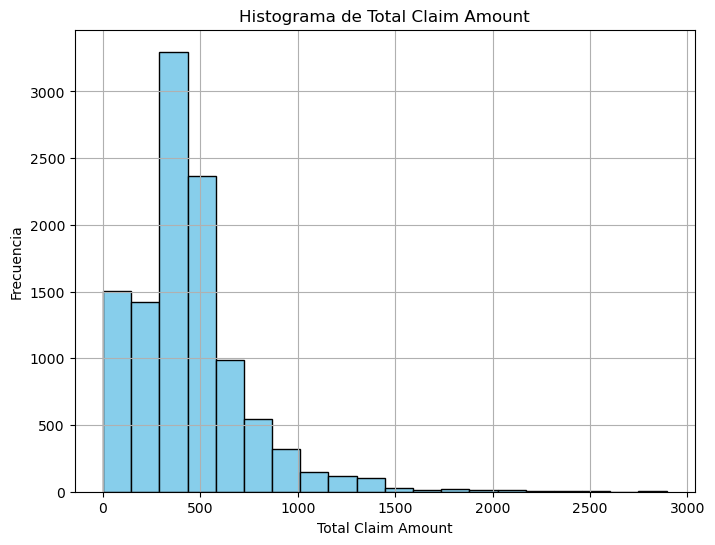

In [56]:
def visualizar_histogramas(dataframe, bins=20):

    for column in dataframe.columns:
        plt.figure(figsize=(8, 6))
        plt.hist(dataframe[column], bins=bins, color='skyblue', edgecolor='black')
        plt.title(f'Histograma de {column}')
        plt.xlabel(column)
        plt.ylabel('Frecuencia')
        plt.grid(True)
        plt.show()

visualizar_histogramas(numerical)

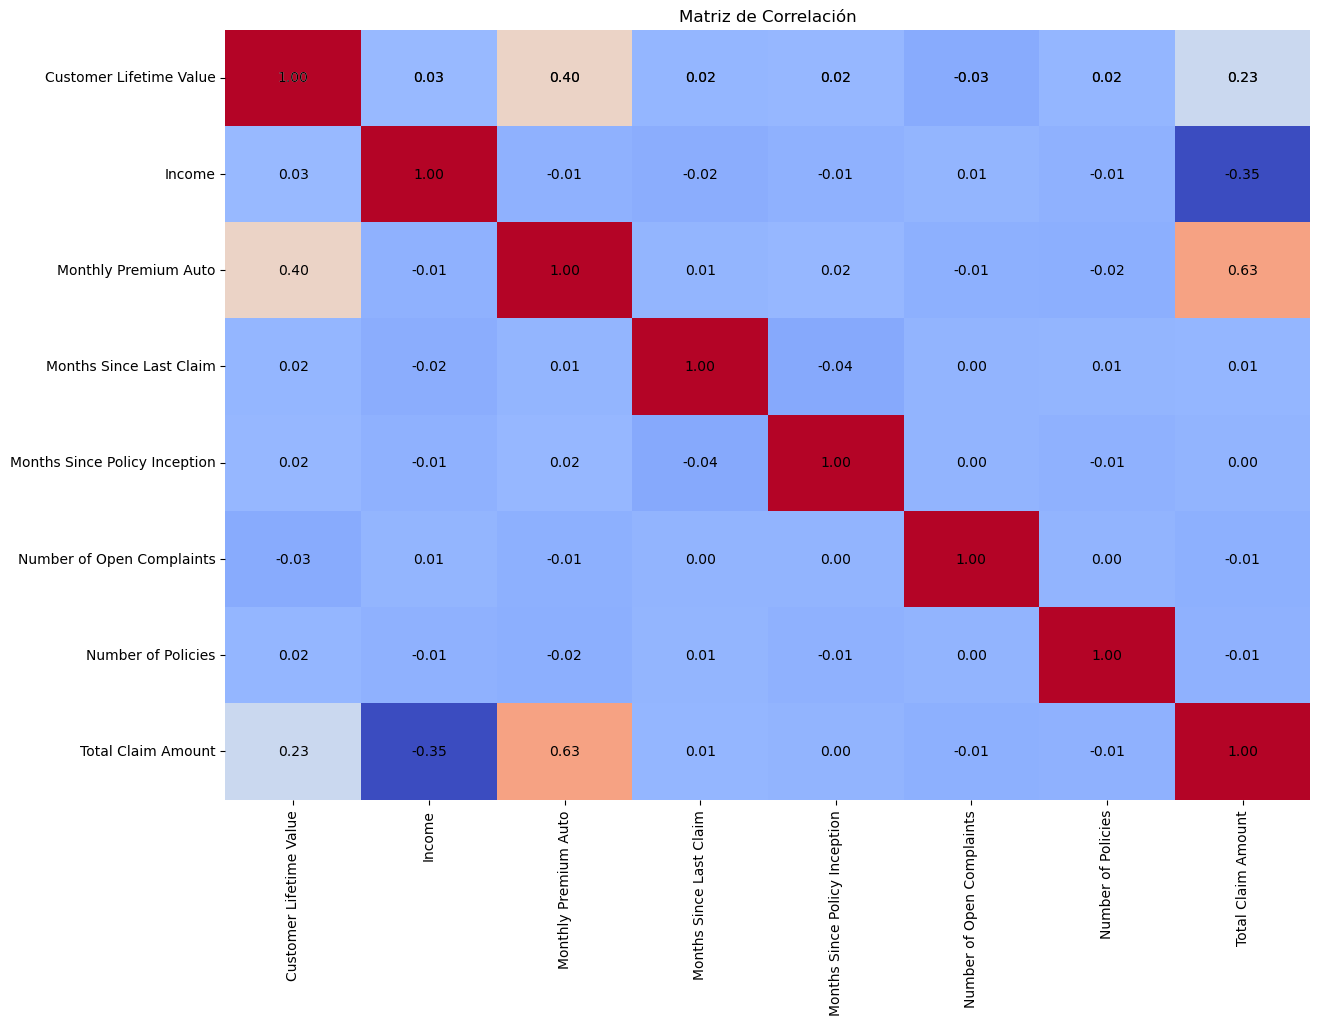

In [57]:
def verificar_multicolinealidad(dataframe):
    # Calcular la matriz de correlación
    correlacion = dataframe.corr()

    # Visualizar cada valor de correlación individualmente
    plt.figure(figsize=(14, 10))
    sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f", cbar=False)
    for i in range(len(correlacion)):
        for j in range(len(correlacion.columns)):
            plt.text(j + 0.5, i + 0.5, "{:.2f}".format(correlacion.iloc[i, j]),
                     ha="center", va="center", color="black")
    plt.title('Matriz de Correlación')
    plt.show()

verificar_multicolinealidad(numerical)


In [58]:
# - Split data into Y (`total_claim_amount`) and X (numerical, independent variables)
numerical.dropna(inplace=True)
y = numerical["Total Claim Amount"]
x = numerical.drop(columns=["Total Claim Amount"])

- Conduct Linear Regressions
  - Using Statsmodels
  - Using sklearn
  - Interpret results

In [59]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10277 entries, 0 to 10909
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer Lifetime Value        10277 non-null  float64
 1   Income                         10277 non-null  int64  
 2   Monthly Premium Auto           10277 non-null  int64  
 3   Months Since Last Claim        10277 non-null  float64
 4   Months Since Policy Inception  10277 non-null  int64  
 5   Number of Open Complaints      10277 non-null  float64
 6   Number of Policies             10277 non-null  int64  
dtypes: float64(3), int64(4)
memory usage: 642.3 KB


In [61]:
x_with_const = sm.add_constant(x)

modelo_stats = sm.OLS(y, x_with_const).fit()

print(modelo_stats.summary())

                            OLS Regression Results                            
Dep. Variable:     Total Claim Amount   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     1591.
Date:                Thu, 25 Apr 2024   Prob (F-statistic):               0.00
Time:                        17:05:36   Log-Likelihood:                -69136.
No. Observations:               10277   AIC:                         1.383e+05
Df Residuals:                   10269   BIC:                         1.383e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [64]:
from sklearn.linear_model import LinearRegression

modelo_sklearn = LinearRegression()

modelo_sklearn.fit(x, y)
mse_sklearn = mean_squared_error(y, modelo_sklearn.predict(x))

print("Coeficientes:", modelo_sklearn.coef_)
print("Intercepto:", modelo_sklearn.intercept_)
print("MSE:", mse_sklearn)

Coeficientes: [-4.89044659e-04 -3.31338146e-03  5.36743827e+00 -2.49509284e-02
 -1.05015786e-01 -8.55654226e-01  4.02805904e-01]
Intercepto: 66.90462084926168
MSE: 40810.88154460758


In [65]:
numerical.keys()

Index(['Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies',
       'Total Claim Amount'],
      dtype='object')

In [66]:
# prueba quitando la variable Monthly Premium Auto

numerical.dropna(inplace=True)
y = numerical["Total Claim Amount"]
x = numerical.drop(columns=["Total Claim Amount"])
x = x.drop(columns="Monthly Premium Auto")

x_with_const = sm.add_constant(x)

modelo_stats = sm.OLS(y, x_with_const).fit()

print(modelo_stats.summary())

                            OLS Regression Results                            
Dep. Variable:     Total Claim Amount   R-squared:                       0.182
Model:                            OLS   Adj. R-squared:                  0.182
Method:                 Least Squares   F-statistic:                     381.6
Date:                Thu, 25 Apr 2024   Prob (F-statistic):               0.00
Time:                        17:19:55   Log-Likelihood:                -71877.
No. Observations:               10277   AIC:                         1.438e+05
Df Residuals:                   10270   BIC:                         1.438e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

Se observa un deterioro en el desempeño del modelo, evidenciado por la disminución del coeficiente de determinación (R^2), que pasa de 0.52 a 0.182.